# Эффект Холла 

In [15]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import linregress
import scipy

In [16]:
def printLineCoefficients(MNK: scipy.stats._stats_mstats_common.LinregressResult):
    print("Коэффициент a: "+str(MNK.slope)+ " +/- "+str(MNK.stderr))
    print("Коэффициент b: "+str(MNK.intercept)+ " +/- "+str(MNK.intercept_stderr))

### Зависимость индукции магнитного поля магнита от силы тока

In [17]:
data_magnet = pd.DataFrame(
                    {'I': np.array([0,0.3,0.5,0.7,0.9,1.1,1.3,1.43,0.15]),
                     'B': np.array([17,322,531,708,849,957,1040,1076,180])*np.power(0.1,3)}
                          )
# I - сила тока [A], B - индукция магнитного поля [Тл] 
data_magnet

,I,B
0,0.00,0.017
1,0.30,0.322
2,0.50,0.531
3,0.70,0.708
4,0.90,0.849
5,1.10,0.957
6,1.30,1.040
7,1.43,1.076
8,0.15,0.180


##### Линейная интерполяция зависимости

In [18]:
MNK_magnet_data = linregress(data_magnet['I'].to_numpy(),data_magnet['B'].to_numpy())
printLineCoefficients(MNK_magnet_data)

Коэффициент a: 0.7510430546524396 +/- 0.04898187759433301
Коэффициент b: 0.09870503459082625 +/- 0.04196908234463768


##### График зависимости

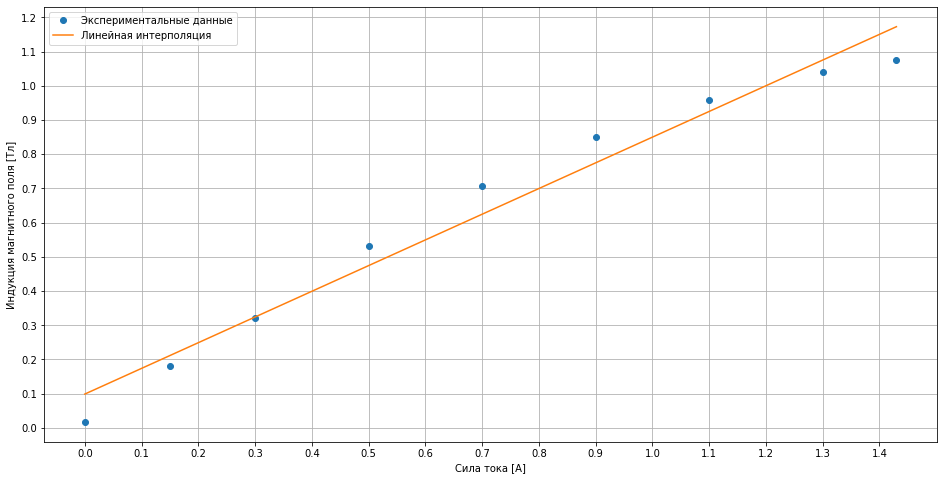

In [23]:
xLine = np.linspace(min(data_magnet.I),max(data_magnet.I),1000)
yLine = MNK_magnet_data.slope*xLine+MNK_magnet_data.intercept

fig,ax = plt.subplots(figsize = (16,8))
plt.plot(data_magnet['I'].to_numpy(),data_magnet['B'].to_numpy(),'o',label = 'Экспериментальные данные')
plt.plot(xLine,yLine,label = r'Линейная интерполяция')

plt.legend()
plt.xlabel(r'Сила тока [А]')
plt.ylabel(r'Индукция магнитного поля [Тл]')
plt.grid()
plt.xticks(np.arange(0,1.5,0.1))
plt.yticks(np.arange(0,1.3,0.1))
plt.title("Зависимость индукции магнитного поля электромагнита от силы тока\n")
plt.show()
